In [2]:
import pandas as pd

df = pd.read_csv("feature_importance.csv", sep="\t")

In [3]:
df = df.assign(model= ["Logistic regression (0.8391)", "Decision tree (0.8369)", "Random forest (0.8700)", "RUSBoost (0.8680)","XGBoost (0.8643)", "Neural network (0.8806)", "Homogeneous GNN (0.8741)", "Heterogeneous GNN (0.8747)"])

In [4]:
df = df.set_index("model")

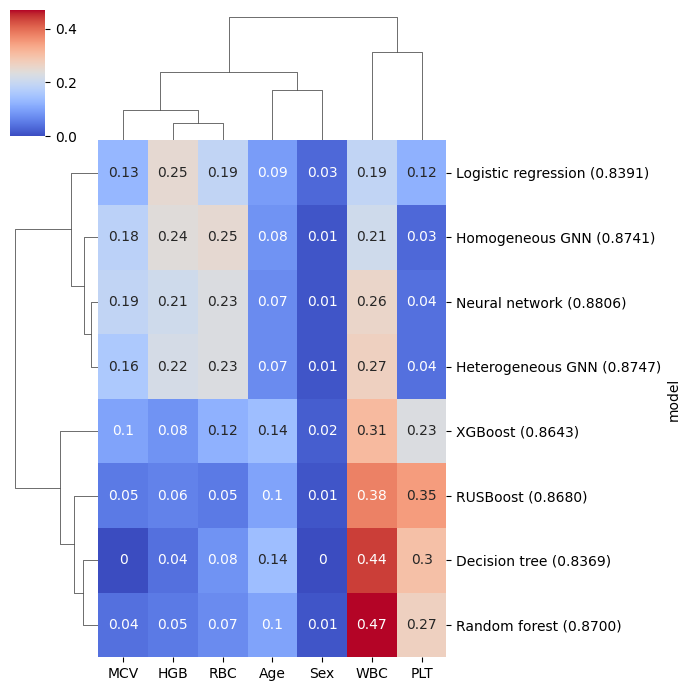

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

clustermap = sns.clustermap(df,cmap='coolwarm', figsize=(7, 7), annot=True)
# clustermap.ax_heatmap.collections[0].set_clim(0, 1)

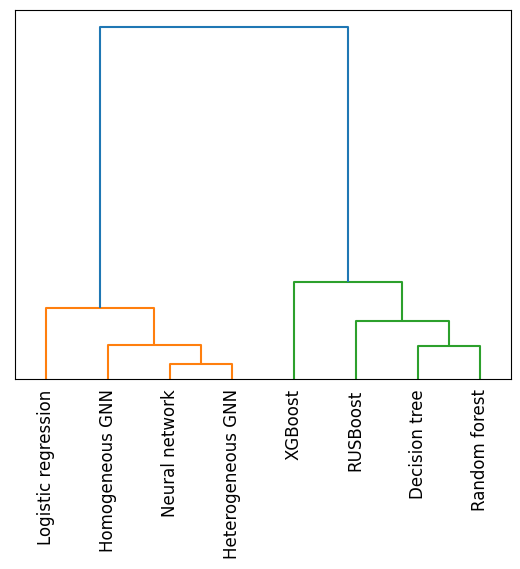

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df.values, method='ward', metric='euclidean')
labels = ["Logistic regression", "Decision tree", "Random forest", "RUSBoost","XGBoost", "Neural network", "Homogeneous GNN", "Heterogeneous GNN"]
p = len(labels)

R = dendrogram(
                linkage_data,
                truncate_mode='lastp',  # show only the last p merged clusters
                p=p,  # show only the last p merged clusters
                no_plot=True,
                )
temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return labels[xx]
dendrogram(linkage_data,leaf_label_func=llf,leaf_rotation=90.,)

# fig, axs =plt.subplots(2,1)
# clust_data = np.random.random((10,3))
# collabel=("col 1", "col 2", "col 3")
# the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')
# axs[1].plot(dendrogram)
ax = plt.gca()
ax.set_yticks([])
# ax.axis('off')
plt.show()

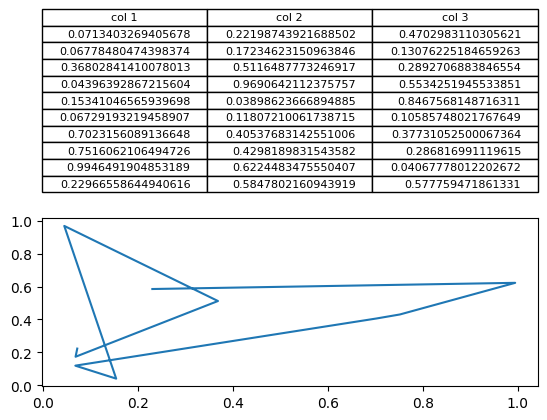

In [35]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs =plt.subplots(2,1)
clust_data = np.random.random((10,3))
collabel=("col 1", "col 2", "col 3")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')

axs[1].plot(clust_data[:,0],clust_data[:,1])
plt.show()